In [1]:
# Import all libraries and dependencies

import datetime
import pandas as pd
import yfinance as yf
from path import Path

In [30]:
#Define the tickers to download data of the stocks.
tickers = ["L.TO"]

# Fetch tickers data from 1/1/2019 until 3/3/2022.
start_date = datetime.date(2019,1,1)
end_date = datetime.date(2022,3,3)
interval = '1d'
period = round((end_date - start_date).days/365,0)
if interval == "1d":
    annual_interval = 252

In [31]:
# Use yfinance to download the data
yf.Tickers(tickers)
stock_data = yf.download(tickers, start = start_date, end = end_date, interval = interval)

# Check the data type
type(stock_data)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [32]:
# Review data
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,60.970001,61.799999,60.450001,61.049999,57.818451,626700
2019-01-03,60.770000,61.110001,60.369999,60.669998,57.458572,617800
2019-01-04,60.930000,61.290001,60.509998,60.799999,57.581684,444100
2019-01-07,61.000000,61.599998,60.470001,61.369999,58.121513,724700
2019-01-08,61.549999,62.090000,61.310001,61.849998,58.576103,601100
...,...,...,...,...,...,...
2022-02-24,95.120003,101.489998,95.010002,101.059998,101.059998,694500
2022-02-25,99.570000,101.430000,97.370003,100.949997,100.949997,810300
2022-02-28,99.919998,100.629997,98.449997,98.870003,98.870003,1081900


In [33]:
# Select closing prices and volume only
price_and_volume = stock_data[["Close", "Volume"]]
price_and_volume.head()

,Close,Volume
Date,,
2019-01-02,61.049999,626700
2019-01-03,60.669998,617800
2019-01-04,60.799999,444100
2019-01-07,61.369999,724700
2019-01-08,61.849998,601100


In [34]:
price_and_volume.tail()

,Close,Volume
Date,,
2022-02-24,101.059998,694500
2022-02-25,100.949997,810300
2022-02-28,98.870003,1081900
2022-03-01,98.019997,497200
2022-03-02,99.489998,439000


In [35]:
# Count nulls. If there are any nulls, drop them.
price_and_volume.isnull().sum()

Close     0
Volume    0
dtype: int64

In [36]:
# Drop the nulls.
price_and_volume = price_and_volume.dropna()

In [37]:
# Check that nulls were successfully dropped.
price_and_volume.isnull().sum()

Close     0
Volume    0
dtype: int64

In [38]:
# Check for duplicates
price_and_volume.duplicated().sum()

0

In [39]:
# Rename Close and Volume to all lower case
price_and_volume.rename(columns= {"Close" : "close", "Volume" : "volume"}, inplace = True)

In [40]:
# Describe data
price_and_volume.describe()

,close,volume
count,795.000000,7.950000e+02
mean,73.512113,5.959356e+05
std,10.941982,3.470714e+05
min,59.470001,1.029000e+05
25%,66.669998,3.759000e+05
50%,69.610001,5.082000e+05
75%,74.879997,7.121500e+05
max,104.419998,3.783900e+06


In [41]:
# Check if closing price and volume are floats 
price_and_volume.dtypes

close     float64
volume      int64
dtype: object

<AxesSubplot:xlabel='Date'>

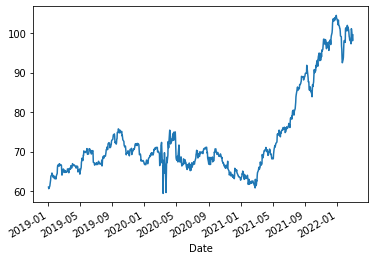

In [42]:
# Plot the closing prices
price_and_volume["close"].plot()

In [43]:
# Save to CSV
file_path = Path("Resources/loblaw.csv")
price_and_volume.to_csv(file_path, index=True, encoding='utf-8-sig')